# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [1]:
def F(n):
    # Start coding
    for i in range(1, n+1):
        print('-'*(n-i), end='')
        for j in range(i):
            print(chr(64+i-j), end='')
        for j in range(i-1):
            print(chr(66+j), end='')
        print('-'*(n-i))

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [2]:
def F(d : dict):
    # Start coding
    for i in d:
        print(i, d[i][0], d[i][1], sep=', ')
    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

1, 1, 2
2, -1, 4
5, -4, 3
4, 2, 3
-8, 4, 2
6, -3, 4
7, 2, 1
5, 9, -10


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [3]:
#TODO
with open('student_records.csv') as f:
	for i in range(10):
		print(f.readline().strip())


roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [4]:
#TODO
students = {}
grade_map = {'AP': 10, 'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6, 'CD': 5, 'DD': 4}
with open('student_records.csv') as f:
	f.readline()
	while True:
		line = f.readline().strip()
		if not line:
			break
		roll_number, department, credit, course_name, course_type, grade = line.split(',')
		if roll_number not in students:
			students[roll_number] = []
		info = {}
		info['department'] = department
		info['credit'] = int(credit)
		info['course_name'] = course_name
		info['course_type'] = course_type
		info['grade'] = grade_map[grade]
		students[roll_number].append(info)

print("roll_number, total_credit, cpi")
for roll_number in students:
	total_credit = 0
	total_credit_times_grade = 0
	for course in students[roll_number]:
		if course['course_type'] == 'honours' or course['course_type'] == 'minor' or course['course_type'] == 'alc':
			continue
		total_credit += course['credit']
		total_credit_times_grade += course['credit'] * course['grade']
	print(roll_number, total_credit, total_credit_times_grade / total_credit)


roll_number, total_credit, cpi
588946 115 8.669565217391304
145372 98 7.428571428571429
834515 146 8.102739726027398
344265 80 8.9
358405 120 8.208333333333334
781075 168 8.470238095238095
180828 114 7.9035087719298245
981238 120 8.275
836881 116 7.922413793103448
310604 115 8.217391304347826
847809 100 8.27
773982 139 7.784172661870503
500658 128 8.1171875
810863 108 8.055555555555555
124663 100 8.23
364146 94 8.76595744680851
871746 111 7.792792792792793
270007 140 7.75
597353 77 8.077922077922079
986057 148 7.925675675675675
718510 118 8.703389830508474
836431 78 7.653846153846154
379479 155 8.167741935483871
582912 109 9.275229357798166
788020 90 8.088888888888889
613401 115 8.252173913043478
144528 112 8.571428571428571
485484 132 8.659090909090908
680096 68 8.352941176470589
199713 105 7.980952380952381
851029 114 8.24561403508772
845623 169 8.532544378698224
150503 136 8.433823529411764
214270 126 7.507936507936508
517837 101 8.326732673267326
482623 123 8.520325203252032
721490

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [5]:
#TODO
students_passed = []
for roll_number in students:
	core = 0
	department_elective = 0
	flexible_elective = 0
	hasmed_elective = 0
	for course in students[roll_number]:
		if course['course_type'] == 'core':
			core += course['credit']
		elif course['course_type'] == 'department_elective':
			department_elective += course['credit']
		elif course['course_type'] == 'felxible_elective':
			flexible_elective += course['credit']
		elif course['course_type'] == 'hasmed_elective':
			hasmed_elective += course['credit']
	if core >= 20 and department_elective >= 15 and flexible_elective >= 10 and hasmed_elective >= 5:
		students_passed.append(roll_number)

print(students_passed)


['588946', '834515', '781075', '180828', '981238', '836881', '310604', '773982', '500658', '810863', '124663', '871746', '986057', '379479', '144528', '485484', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '265922', '283796', '203200', '327122', '534763', '391848', '971123', '207443', '488661', '782129', '928288', '581858', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '970791', '143142', '998293', '681499', '888886', '608522', '362471', '692318', '626000', '581065', '787967', '381227', '750259', '881983', '294697']


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [6]:
#TODO

students_with_minor = []
for roll_number in students:
	department_credit = {}
	for course in students[roll_number]:
		if course['course_type'] == 'minor':
			if course['department'] not in department_credit:
				department_credit[course['department']] = 0
			department_credit[course['department']] += course['credit']
	for department in department_credit:
		if department_credit[department] >= 10:
			students_with_minor.append(roll_number)
			break

print(students_with_minor)


['588946', '145372', '834515', '344265', '358405', '781075', '180828', '981238', '836881', '847809', '773982', '500658', '810863', '124663', '364146', '871746', '270007', '597353', '986057', '718510', '836431', '379479', '582912', '788020', '613401', '144528', '485484', '680096', '199713', '851029', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '194063', '265922', '283796', '203200', '301135', '327122', '381526', '534763', '391848', '329535', '971123', '207443', '488661', '782129', '581858', '733782', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '478606', '995208', '841365', '970791', '143142', '998293', '907454', '681499', '888886', '608522', '362471', '465496', '208100', '138296', '775967', '692318', '461584', '626000', '458200', '581065', '787967', '381227', '750259', '881983', '294697', '816041', '993835']


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [7]:
#TODO
students_with_honours = []
for roll_number in students:
	honours = 0
	core = 0
	for course in students[roll_number]:
		if course['course_type'] == 'honours':
			honours += course['credit']
		elif course['course_type'] == 'core':
			core += course['credit']
	if honours >= 10 and core >= 20:
		students_with_honours.append(roll_number)

print(students_with_honours)


['588946', '145372', '834515', '781075', '836881', '310604', '773982', '500658', '810863', '124663', '364146', '871746', '986057', '718510', '379479', '582912', '788020', '613401', '144528', '485484', '199713', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '589528', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '265922', '283796', '203200', '327122', '534763', '391848', '971123', '207443', '488661', '782129', '928288', '581858', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '870642', '970791', '143142', '998293', '681499', '888886', '608522', '362471', '465496', '208100', '692318', '626000', '458200', '581065', '787967', '750259', '881983', '294697']


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [8]:
#TODO
import scipy
import numpy as np

def f(vars):
	x, y = vars
	return 2*(x - y - 3)**2 + 4*(x + 2*y + 1)**4

def ineq1(vars):
	x, y = vars
	return x - y + 3

def ineq2(vars):
	x, y = vars
	return 5 - (x + 2)**2 - (y + 1)**2

con1 = {'type': 'ineq', 'fun': ineq1}
con2 = {'type': 'ineq', 'fun': ineq2}

result = scipy.optimize.minimize(f, [1, 1], constraints=[con1, con2])
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026153552391
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.583e-01]
    nfev: 30
    njev: 9


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [9]:
#TODO
from scipy.integrate import quad
def f(x, y):
	return x**2 + y**4

R = np.sqrt(3)
def integrand(theta):
	x = R * np.cos(theta)
	y = R * np.sin(theta)
	return f(x, y) * R

result, error = quad(integrand, 0, 2*np.pi)
print(result)

53.05363140385085


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [10]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [11]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=',')

In [12]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        return data[np.random.choice(data.shape[0], K, replace=False)]
    else:
        return init_centers

In [13]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [14]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    return np.linalg.norm(data[:, None] - centers, axis=2)

In [15]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [16]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    def find_mean(i):
        return np.mean(data[np.where(labels == i)], axis=0)

    here_func = np.vectorize(find_mean, signature='()->(n)')
    return here_func(np.arange(K))


In [17]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [18]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [19]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')
    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0028755664825439453


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

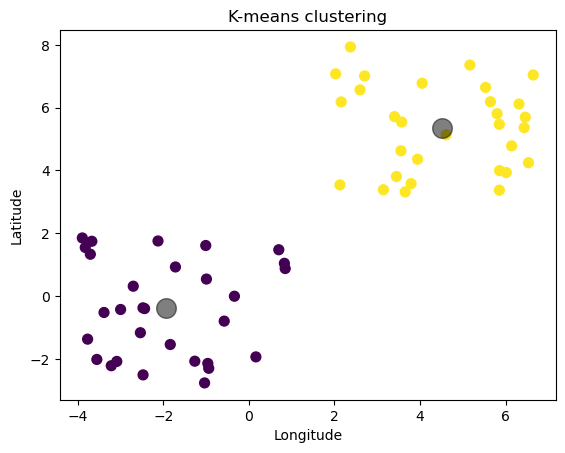

In [20]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)